## Import Libraries :

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate,RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,precision_recall_curve
import pickle
from flask import Flask
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from pykernels.regular import GeneralizedHistogramIntersection

## Load the Data :

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


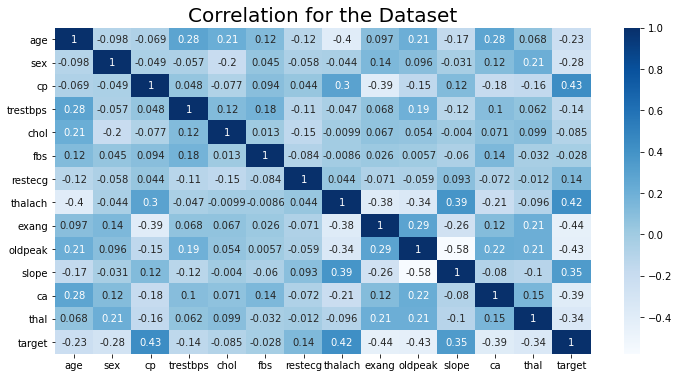

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title("Correlation for the Dataset",fontsize=20)
plt.show()

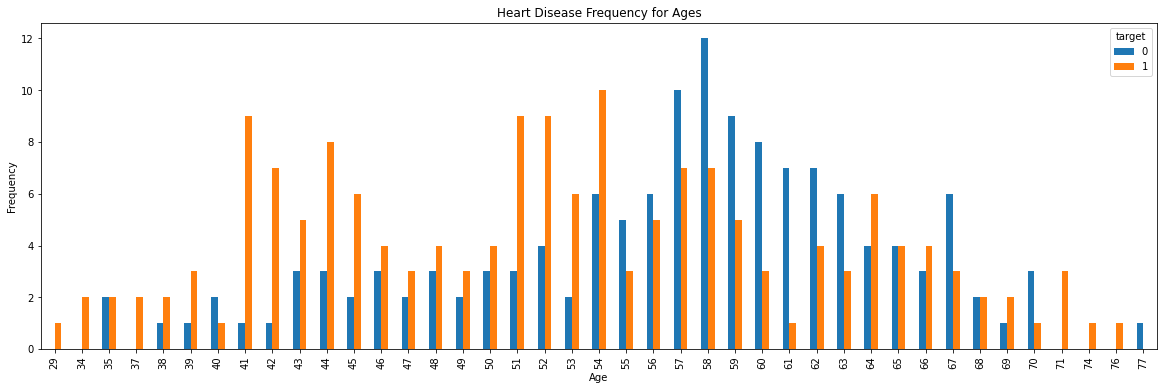

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

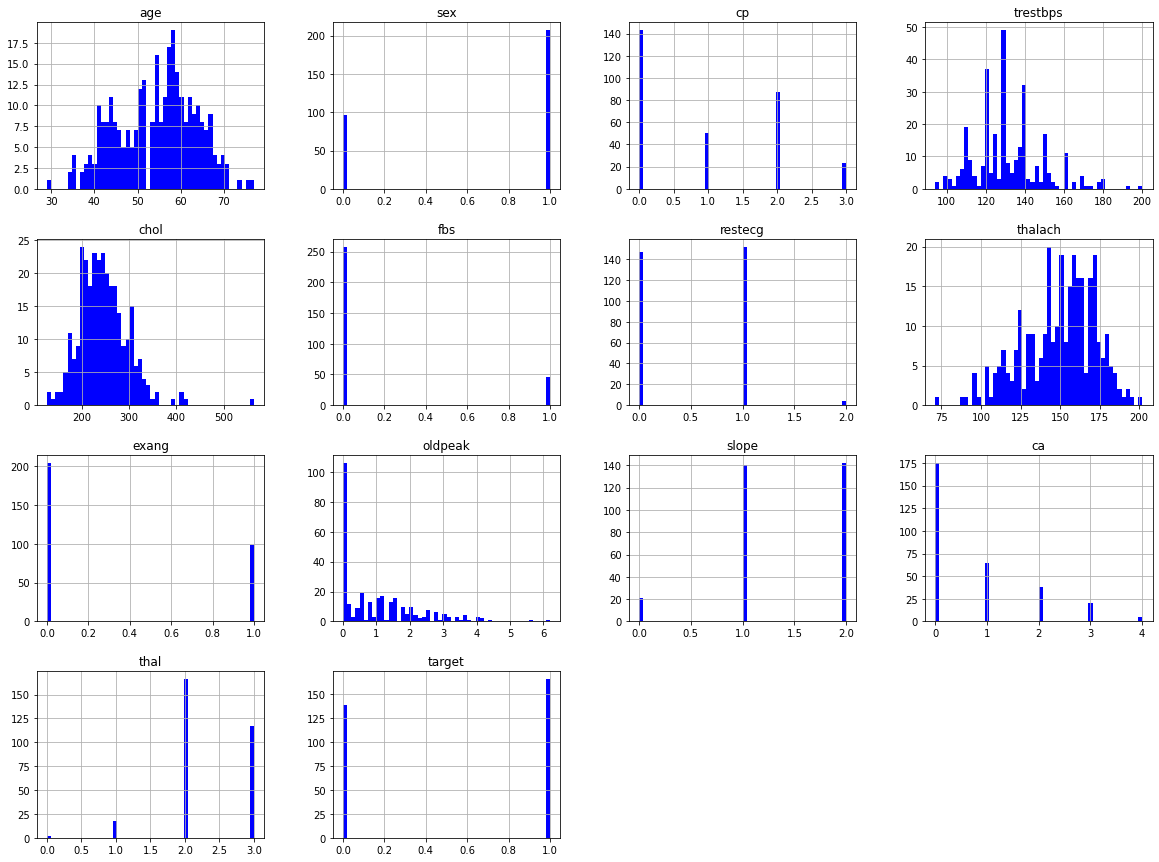

In [10]:
df.hist(bins=50,color='blue',figsize=(20,15))
plt.show()

### Missing Values :

<AxesSubplot:>

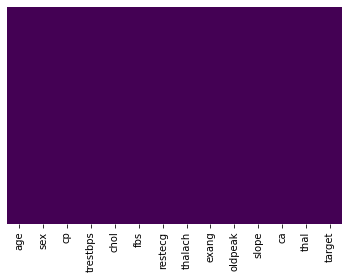

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Great dummy variables :

In [12]:
df= pd.get_dummies(df, columns=['cp','restecg','slope','ca','thal'], drop_first=True)

In [13]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

In [14]:
df.shape

(303, 23)

In [15]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,1,0,0,0,0,0,1,0


## Split The Data into Train and Test :

In [16]:
x=df.drop(['target'],axis=1).values
y=df['target'].values

In [17]:
print("Feature shape :\n",x.shape)
print("Target shape :\n",y.shape)

Feature shape :
 (303, 22)
Target shape :
 (303,)


In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

print(f"Rows in training set is {len(train_set)}\nRows in test set is {len(test_set)}")

In [19]:
print("X_train shape :\n",X_train.shape)
print("y_train shape :\n",y_train.shape)
print("X_test shape :\n",X_test.shape)
print("y_test shape :\n",y_test.shape)

X_train shape :
 (242, 22)
y_train shape :
 (242,)
X_test shape :
 (61, 22)
y_test shape :
 (61,)


**Feature Scaling for Model Performance :**

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
np.set_printoptions(suppress=True) #convert exponential form to normal form

## Building Model :

In [22]:
gh_model = SVC(kernel = GeneralizedHistogramIntersection(),probability=True)#c parameter
gh_model.fit(X_train,y_train)

SVC(kernel=GeneralizedHistogramIntersection, probability=True)

In [23]:
gh_y_pred = gh_model.predict(X_test)
gh_y_pred_Prob = gh_model.predict_proba(X_test)[:,1]
gh_y_pred_t = gh_model.predict(X_train)

Confusion metrics : Generalized histogram intersection kernel 
 [[24  5]
 [ 1 31]]


<AxesSubplot:>

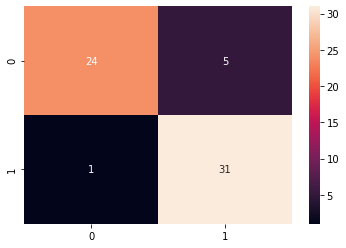

In [24]:
gh_cn=confusion_matrix(y_test,gh_y_pred)
print("Confusion metrics : Generalized histogram intersection kernel \n",gh_cn)
sns.heatmap(gh_cn,annot=True,cbar=True)

In [25]:
train_score = accuracy_score(y_train, gh_y_pred_t)*100
test_score = accuracy_score(y_test, gh_y_pred)*100
print("Train Accuracy on Generelized histogram intersection kernel : ", train_score)
print("Test Accuracy on Generelized histogram intersection kernel: ", test_score)

Train Accuracy on Generelized histogram intersection kernel :  90.49586776859503
Test Accuracy on Generelized histogram intersection kernel:  90.1639344262295


In [26]:
from sklearn.metrics import classification_report
gh_report = classification_report(y_test,gh_y_pred)
print(gh_report)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.86      0.97      0.91        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [27]:
precision = precision_score(y_test,gh_y_pred)*100
print("Precision :: {}".format("%.2f" %precision))
recall = recall_score(y_test,gh_y_pred)*100
print("Recall    :: {}".format("%.2f" %recall))

tn, fp, fn, tp = confusion_matrix(y_test, gh_y_pred).ravel()
specificity = (tn / (tn+fp))*100
print("Specificity :: {}".format("%.2f" %specificity))
    
fscore = f1_score(y_test,gh_y_pred)*100
print("F1score   :: {}".format("%.2f" %fscore))

Precision :: 86.11
Recall    :: 96.88
Specificity :: 82.76
F1score   :: 91.18


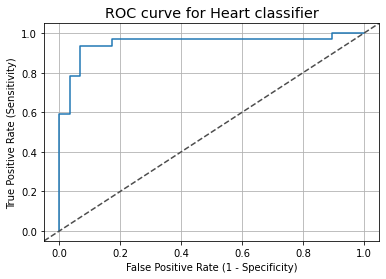

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, gh_y_pred_Prob)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [29]:
Accuracy13 = pd.DataFrame(data=[["Generalized Hist", train_score, test_score, precision, recall, specificity, fscore]], 
                          columns=['Model', 'TrainingAccuracy', 'TestingAccuracy','Precision',"Recall",'Specificity','F1score'])
Accuracy13

,Model,TrainingAccuracy,TestingAccuracy,Precision,Recall,Specificity,F1score
0,Generalized Hist,90.495868,90.163934,86.111111,96.875,82.758621,91.176471


### Save pickle model

In [37]:
saved_model = pickle.dumps(gh_model)

In [38]:
pickle.dump(gh_model,open('model.pkl','wb'))

In [39]:
svm_from_pickle = pickle.loads(saved_model)

In [40]:
svm_from_pickle.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])